# Analyzing the factors leading to Customer Churn.

In [44]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [45]:
data = pd.read_csv("telco.csv")

In [46]:
data = data.drop_duplicates()

In [47]:
def display_all_rows():
    """ Shows all the rows available"""
    pd.set_option("display.max.rows", None)

def reset_row_default():
    """Resets rows to default"""
    pd.reset_option('display.max.rows')   

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [49]:
pd.reset_option('display.max.rows')

In [50]:
pd.set_option("display.max.columns", 51)

In [51]:
data

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,Landers,92285,34.341737,-116.539416,2182,Q3,No,0,72,NaN,Yes,22.77,No,No,NaN,0,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,Adelanto,92301,34.667815,-117.536183,18980,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,Cable,24,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,Amboy,92304,34.559882,-115.637164,42,Q3,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Fiber Optic,59,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,Angelus Oaks,92305,34.167800,-116.864330,301,Q3,Yes,1,11,NaN,No,0.00,No,Yes,DSL,17,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [52]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Replace missing values with "" in column: 'Churn Reason'
    data = data.fillna({'Churn Reason': "I'm still a customer"})
    # Replace all instances of "" with "" in column: 'Churn Reason'
    data['Churn Reason'] = data['Churn Reason'].str.replace("I'm still a customer", "", case=False, regex=False)
    # Replace missing values with "" in column: 'Churn Category'
    data = data.fillna({'Churn Category': "Did not churn"})
    # Replace missing values with "" in column: 'Internet Type'
    data = data.fillna({'Internet Type': "Not Subscribed"})
    # Replace missing values with "" in column: 'Offer'
    data = data.fillna({'Offer': "Not Specified"})
    return data

data = clean_data(data.copy())
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,Not Specified,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [54]:
pd.reset_option("display.max_rows")

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Population,7043.0,22139.603294,21152.392837,11.000000,2344.000000,17554.000000,36125.000000,105285.000000
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000


<Axes: >

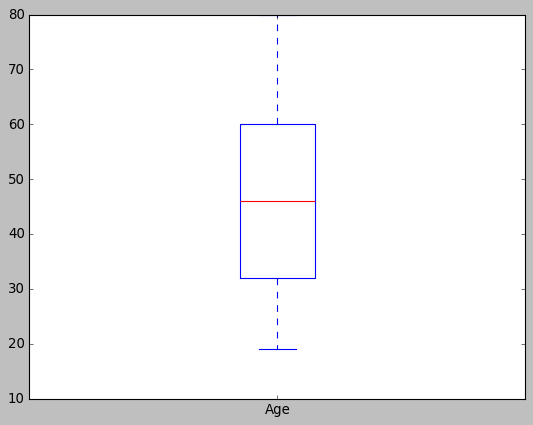

In [56]:
data["Age"].plot(kind="box")

In [57]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [105]:
churned_customers = data[data["Churn Label"] == "Yes"]

#### Trying to visualize the relationship between Churn Labels and Age

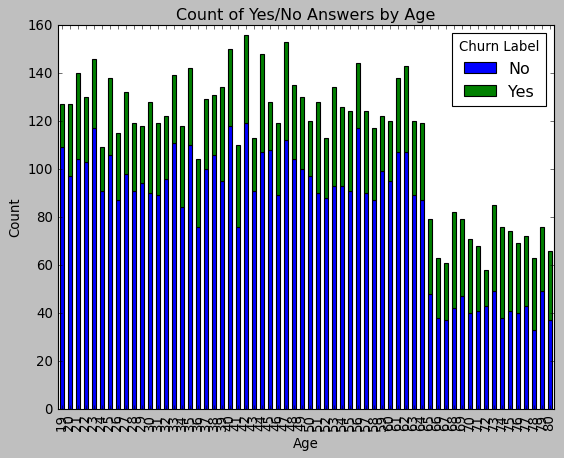

In [115]:
# plt.figure(figsize=(12, 8))
data.groupby(['Age', 'Churn Label']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Yes/No Answers by Age')
plt.show()

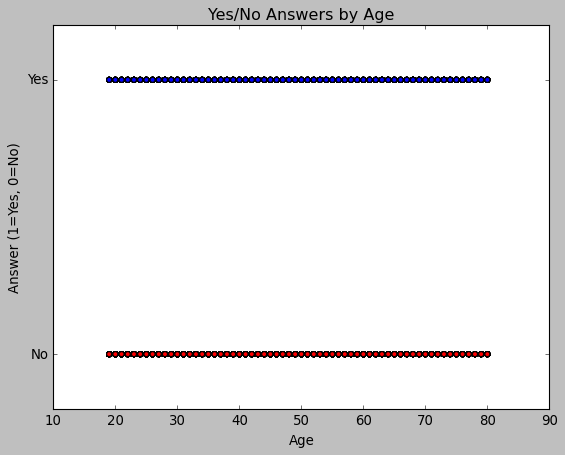

In [59]:
data['Answer_Num'] = data["Churn Label"].map({'Yes': 1, 'No': 0})

# Create a scatter plot
# plt.figure(figsize=(12, 8))
plt.scatter(data['Age'], data['Answer_Num'], c=data['Answer_Num'].map({1: 'blue', 0: 'red'}))
plt.xlabel('Age')
plt.ylabel('Answer (1=Yes, 0=No)')
plt.title('Yes/No Answers by Age')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()

#### Trying to visualize the relationship between Churn Labels and Internet Type

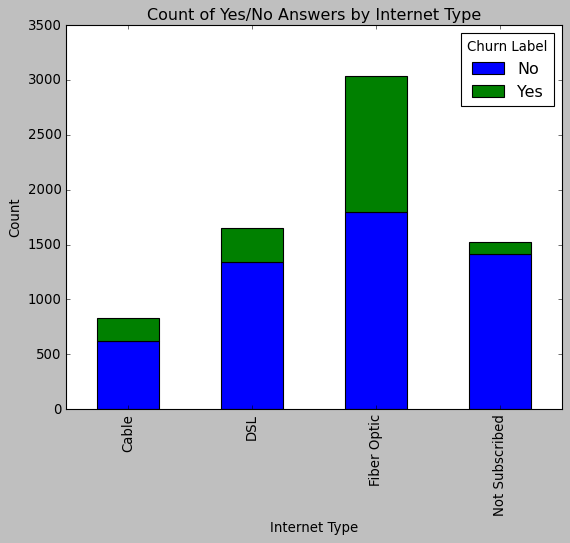

In [60]:
data.groupby(['Internet Type', 'Churn Label']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Internet Type')
plt.ylabel('Count')
plt.title('Count of Yes/No Answers by Internet Type')
plt.show()

In [61]:
data["Offer"].describe()

count              7043
unique                6
top       Not Specified
freq               3877
Name: Offer, dtype: object

#### Trying to Visualise the relationship between churn labels and Avg Monthly GB Download

<Axes: >

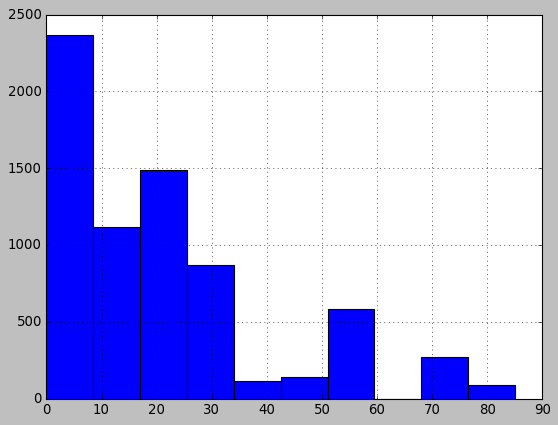

In [62]:
data["Avg Monthly GB Download"].hist()

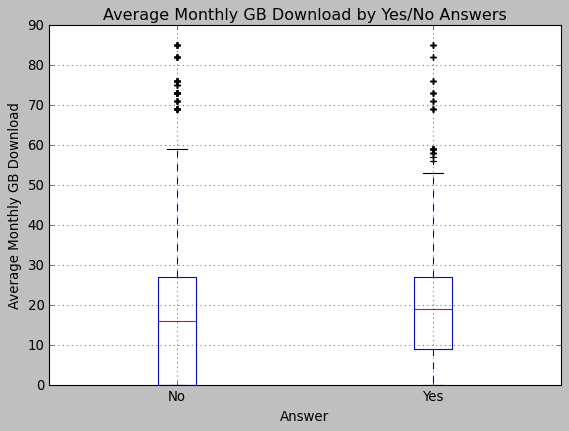

In [63]:
# Create a box plot
data.boxplot(column="Avg Monthly GB Download", by="Churn Label")
plt.xlabel('Answer')
plt.ylabel('Average Monthly GB Download')
plt.title('Average Monthly GB Download by Yes/No Answers')
plt.suptitle('')  # Suppress the default title
plt.show()

In [64]:
reset_row_default()
contains_attitude = data["Churn Category"].str.contains("Attitude")
attitude_true = len([i for i in contains_attitude if i == True])
print(f"{attitude_true} of {len(contains_attitude)} are not comfortable with the attitude of the Telco.")

314 of 7043 are not comfortable with the attitude of the Telco.


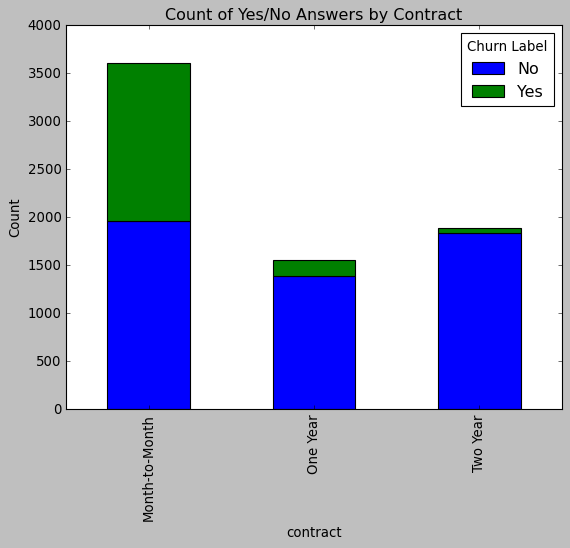

In [65]:
data.groupby(['Contract', 'Churn Label']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('contract')
plt.ylabel('Count')
plt.title('Count of Yes/No Answers by Contract')
plt.show()

### Trying to visualse the relationship between Online Security and Churn Label

In [66]:
data["Online Security"].mode()

0    No
Name: Online Security, dtype: object

<Figure size 960x640 with 0 Axes>

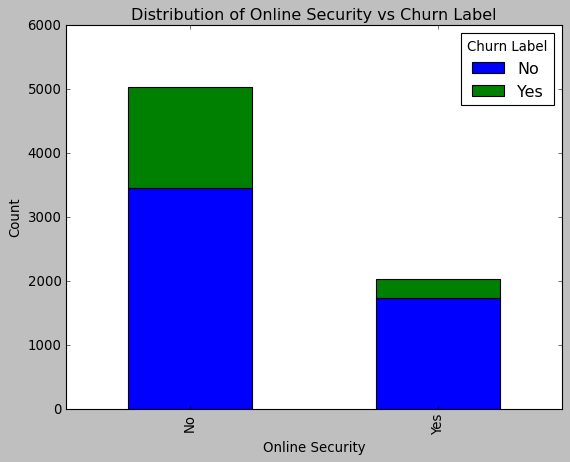

In [67]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a crosstab to count occurrences
crosstab = pd.crosstab(data['Online Security'], data["Churn Label"])

# Plot the crosstab as a stacked bar plot
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.title('Distribution of Online Security vs Churn Label')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4344\2234103363.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Longitude'], y=data['Latitude'], cmap='Reds', shade=True, bw_adjust=0.5)
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


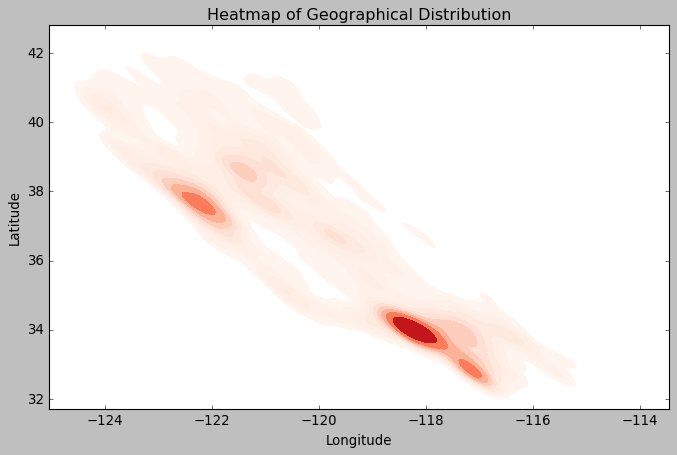

In [68]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=data['Longitude'], y=data['Latitude'], cmap='Reds', shade=True, bw_adjust=0.5)
plt.title('Heatmap of Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

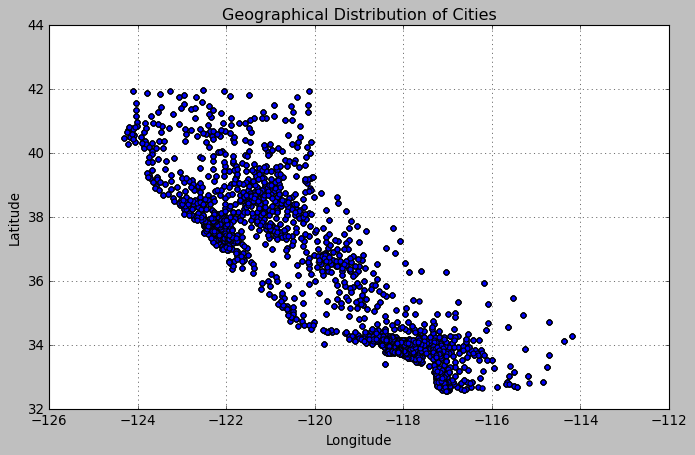

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c='blue', marker='o')
plt.title('Geographical Distribution of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

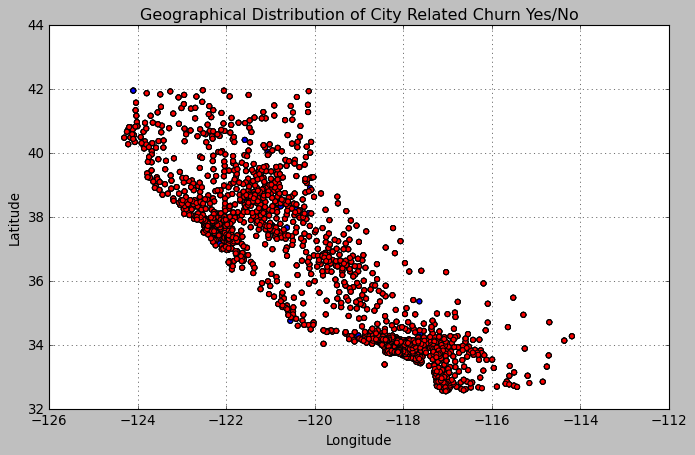

In [70]:
colors = data['Churn Label'].map({'Yes': 'blue', 'No': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=colors, marker='o')
plt.title('Geographical Distribution of City Related Churn Yes/No')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [71]:
status_counts = data['Customer Status'].value_counts()

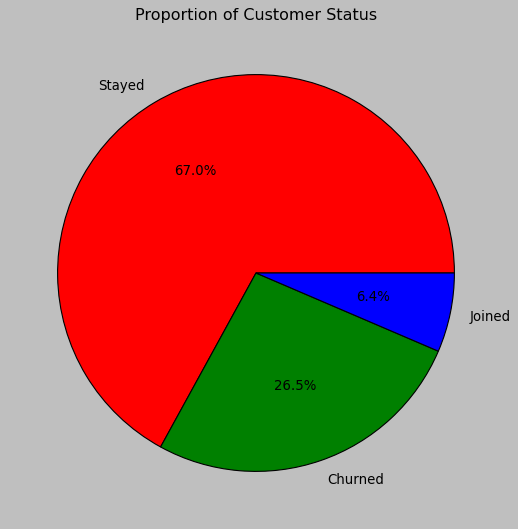

In [72]:
# Create a pie chart
plt.figure(figsize=(8, 8))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.ylabel('')
plt.title('Proportion of Customer Status')
plt.show()


## Trying to figure out the relationship between CLTV and general customer churn

<Axes: >

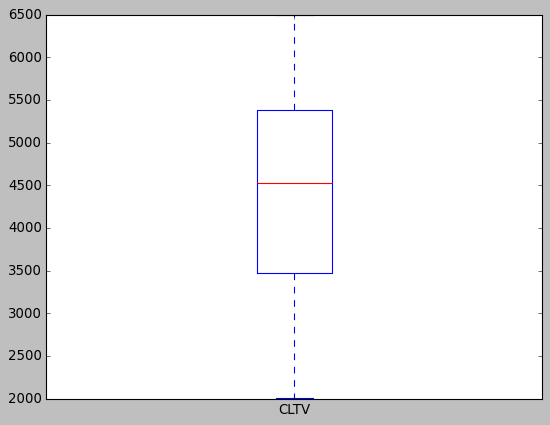

In [73]:
data["CLTV"].plot(kind="box")

In [74]:
valued_customers = data[data["CLTV"] >= 5380.5]


print(f"{valued_customers.shape[0]} are valuable customers")

1761 are valuable customers


In [75]:
valued_customers[valued_customers["Customer Status"] == "Stayed"].shape[0]

1310

### Using a Facet Grid to visualize Why valuable customers are churning

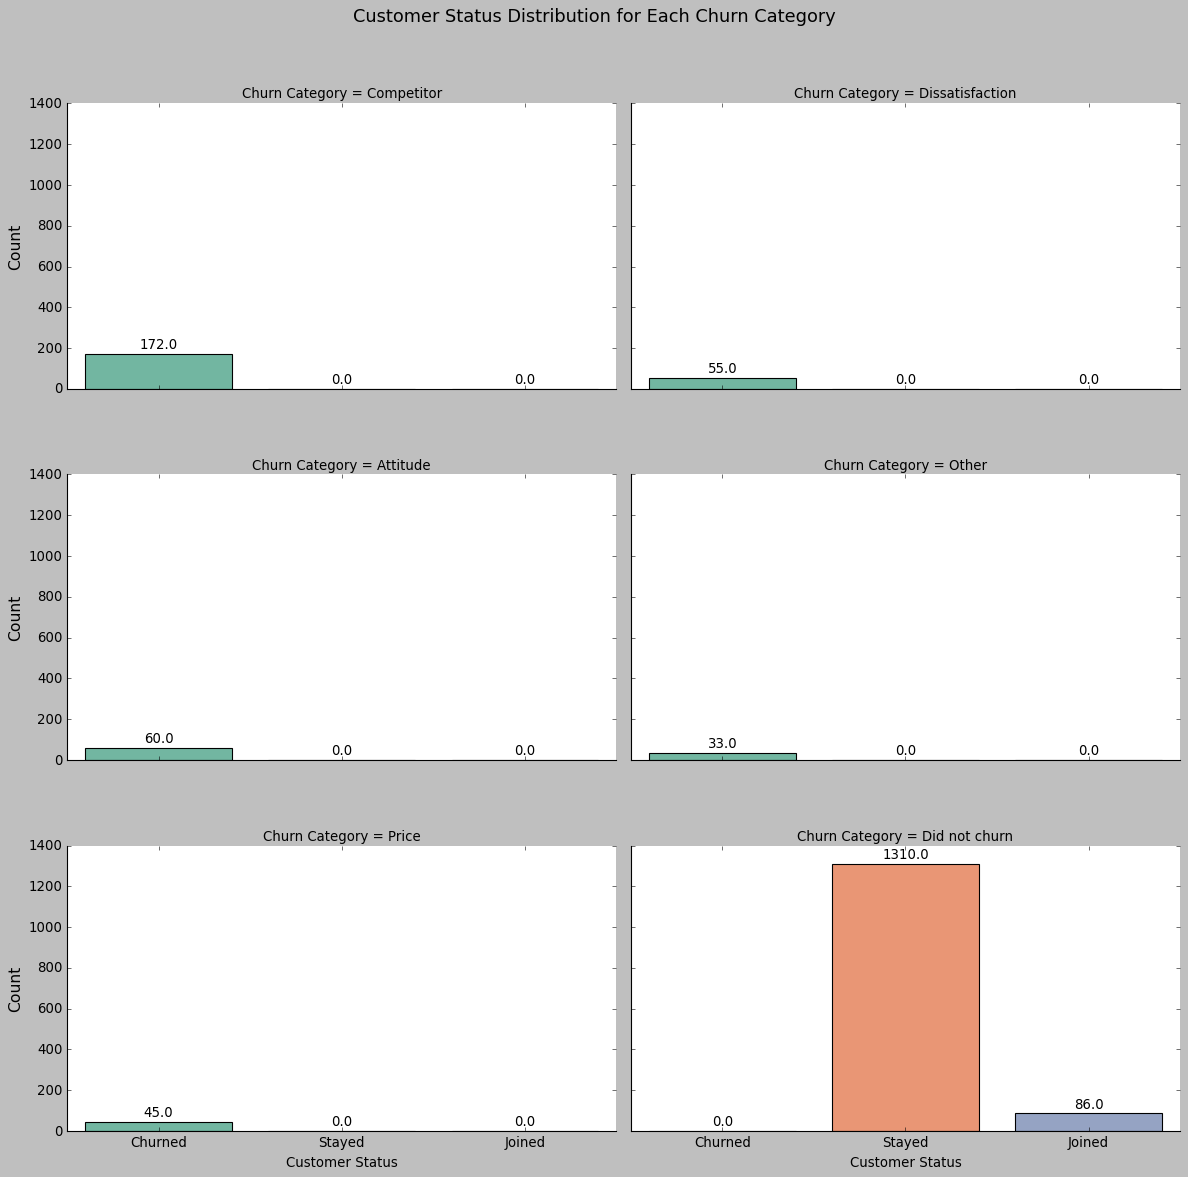

In [76]:


# Increase plot size and aspect ratio, set col_wrap to wrap the plots vertically
g = sns.FacetGrid(valued_customers, col="Churn Category", height=5, aspect=1.5, col_wrap=2)

# Create count plots for each facet with rotated x-axis labels and custom colors
g.map(sns.countplot, "Customer Status", order=["Churned", "Stayed", "Joined"], palette='Set2')

# Adjust the spacing between plots
g.fig.subplots_adjust(top=0.9, hspace=0.3)

# Add a title with a larger font size
g.fig.suptitle('Customer Status Distribution for Each Churn Category', fontsize=16)

# Iterate through each axis in the grid and customize further
for ax in g.axes.flat:
    # Add labels for x and y axis with larger font sizes
    # ax.set_xlabel('Customer Status', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    
    # Rotate x-axis labels for better readability
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=12)
    
    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Show the final plot
plt.show()


#### The Faucet grid shows that the main contributor of valuable customers churn is because of competitors

### Using a Heatmap (Contingency Table) to visualize Why valuable customers are churning

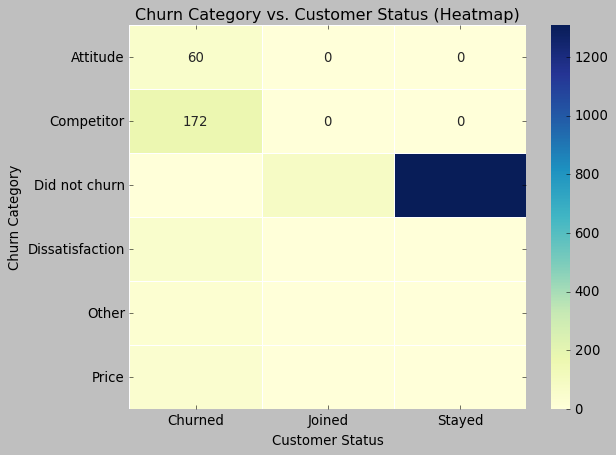

In [77]:
# Crosstab
churn_heatmap_data = pd.crosstab(valued_customers["Churn Category"], valued_customers["Customer Status"])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(churn_heatmap_data, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)

plt.title('Churn Category vs. Customer Status (Heatmap)')
plt.xlabel('Customer Status')
plt.ylabel('Churn Category')
plt.show()

#### The Heatmap indicates that the main contributors of customer churn is Competitor and Service Attitude related.

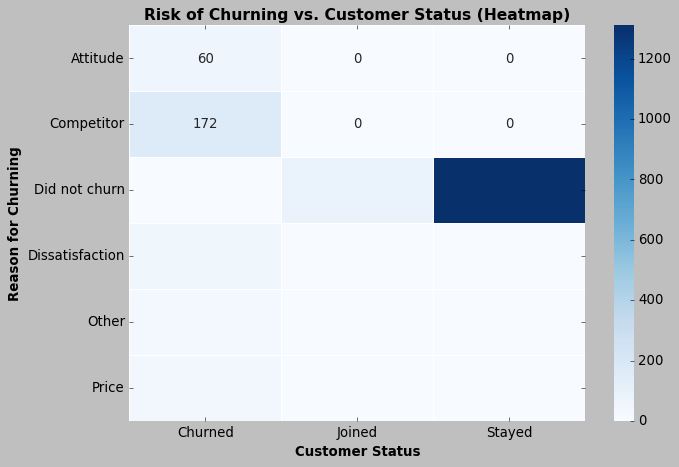

In [78]:
# Heatmap with descriptive colors
plt.figure(figsize=(9, 6))
sns.heatmap(churn_heatmap_data, annot=True, cmap="Blues", fmt="d", linewidths=.5)

# Informative layout
# plt.imshow(churn_heatmap_data, cmap='Greens', label="Churn Risk")
# plt.colorbar(label="Churn Risk")  # Add colorbar with label
# Annotate max value (optional)
# max_value = churn_heatmap_data.max().max()
# for i in range(len(churn_heatmap_data.columns)):
#     for j in range(len(churn_heatmap_data.index)):
#         if churn_heatmap_data.iloc[j, i] == max_value:
#             plt.text(i, j, int(max_value), ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('Risk of Churning vs. Customer Status (Heatmap)', fontsize=14, fontweight='bold')
plt.xlabel('Customer Status', fontsize=12, fontweight='bold')
plt.ylabel('Reason for Churning', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.style.use('classic')  # Optional: white background
plt.tight_layout()  # Adjust spacing for better layout
plt.show()

### Going deeper into the reason why Valuable Customers using feedback from the "Churn Reason" series.

In [79]:
valued_customers["Churn Reason"].value_counts()

Churn Reason
                                             1396
Competitor made better offer                   69
Competitor had better devices                  58
Attitude of support person                     42
Competitor offered more data                   26
Don't know                                     23
Price too high                                 21
Competitor offered higher download speeds      19
Attitude of service provider                   18
Long distance charges                          14
Product dissatisfaction                        12
Service dissatisfaction                        12
Network reliability                            12
Limited range of services                       8
Lack of self-service on Website                 8
Lack of affordable download/upload speed        7
Moved                                           6
Extra data charges                              3
Poor expertise of phone support                 3
Poor expertise of online support     

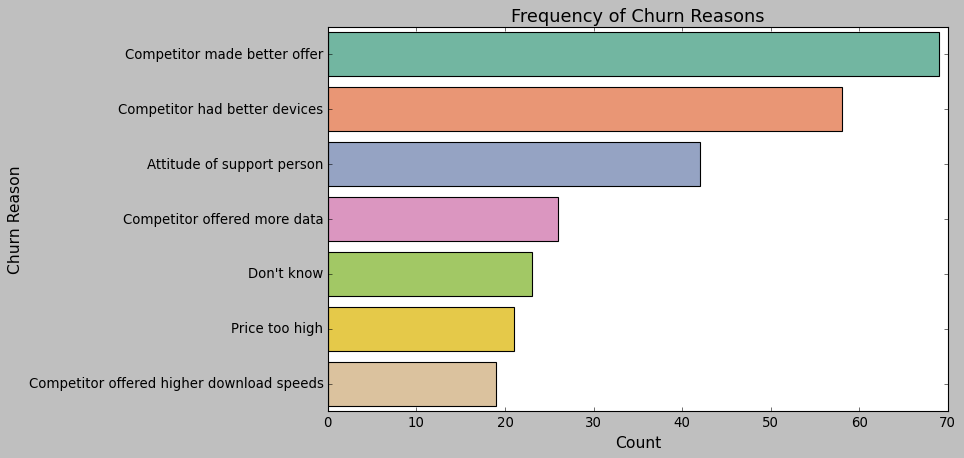

In [80]:
# Count the frequency of each churn reason
valued_customers_cleaned = valued_customers[valued_customers["Churn Reason"] != ""]
churn_reason_counts = valued_customers_cleaned["Churn Reason"].value_counts().head(7)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_reason_counts.values, y=churn_reason_counts.index, palette='Set2')

plt.title('Frequency of Churn Reasons', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Churn Reason', fontsize=14)
plt.show()

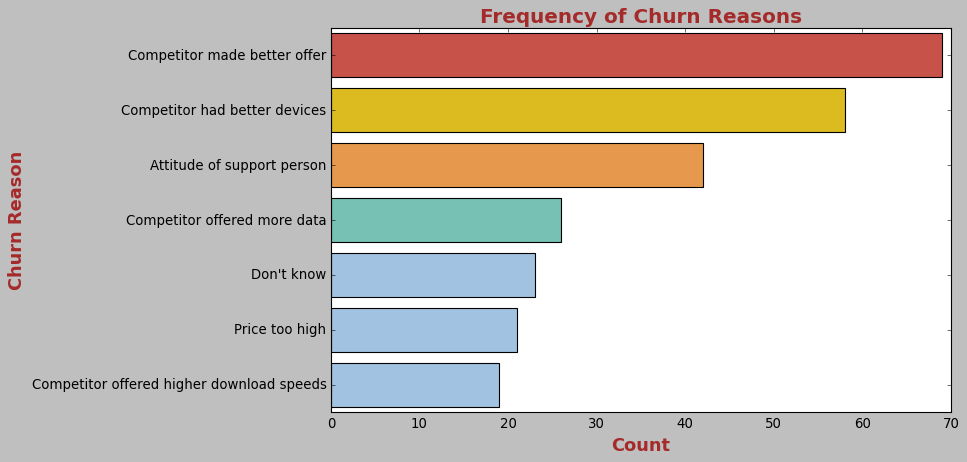

In [81]:
churn_reason_colors = {
    "Competitor made better offer": "#DB4035",
    "Competitor had better devices": "#FAD000",
    "Attitude of support person": "#FF9933",  # Add colors for other reasons you have (up to 7)
    "Competitor offered more data": "#6ACCBC",
    "Don't know": "#96C3EB",
    "Price too high": "#96C3EB",
    "Competitor offered higher download speeds": "#96C3EB"  # Color for remaining reasons
}
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_reason_counts.values,y=churn_reason_counts.index,palette=churn_reason_colors)

plt.title('Frequency of Churn Reasons', fontsize=18, weight='bold', color="brown")
plt.xlabel('Count', fontsize=16, weight='bold', color="brown")
plt.ylabel('Churn Reason', fontsize=16, weight='bold', color="brown")
plt.tick_params(bottom=False, left=True)  # Set ticks inside plot area

# Optional: Rotate long churn reason labels if needed
# plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and right-align

# plt.grid(axis='y', which='major', linestyle='-', linewidth=0.8)  # Major gridlines only
# plt.tight_layout()  # Adjust spacing for better layout

plt.show()

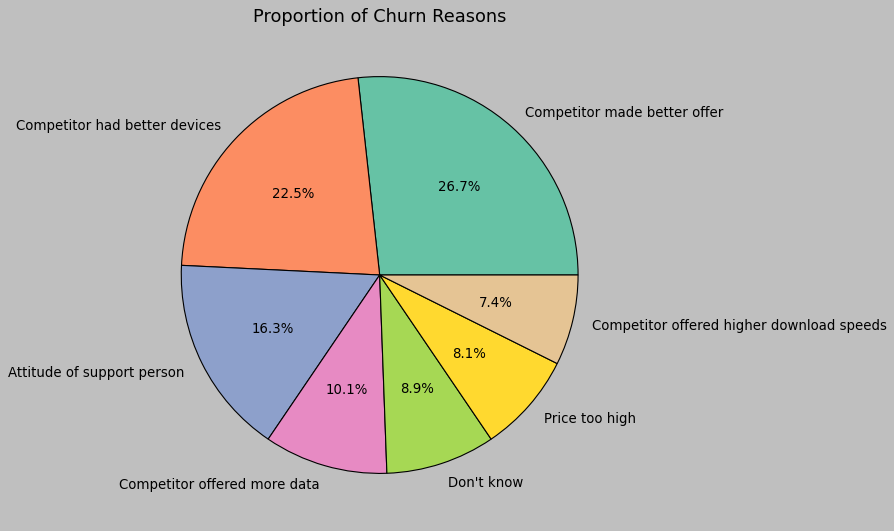

In [82]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_reason_counts, labels=churn_reason_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Proportion of Churn Reasons', fontsize=16)
plt.show()

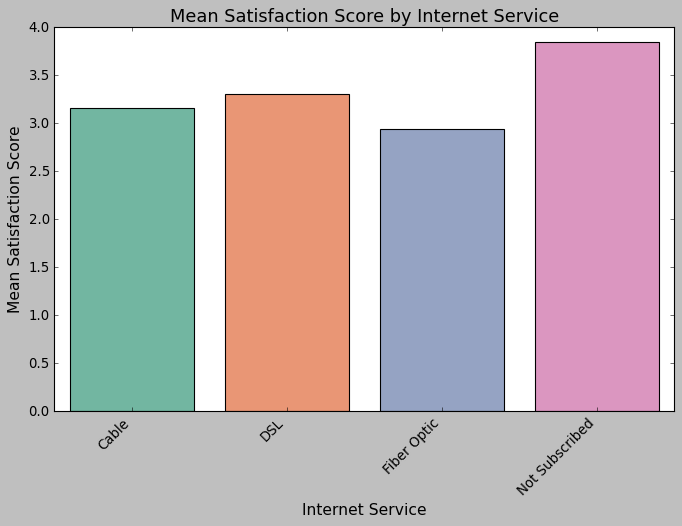

In [83]:
# Calculate the mean satisfaction score for each internet service category
mean_satisfaction_by_internet = data.groupby("Internet Type")["Satisfaction Score"].mean().reset_index()

# Create a bar plot for mean satisfaction score
plt.figure(figsize=(10, 6))
sns.barplot(x="Internet Type", y="Satisfaction Score", data=mean_satisfaction_by_internet, palette='Set2')

plt.title('Mean Satisfaction Score by Internet Service', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Mean Satisfaction Score', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()


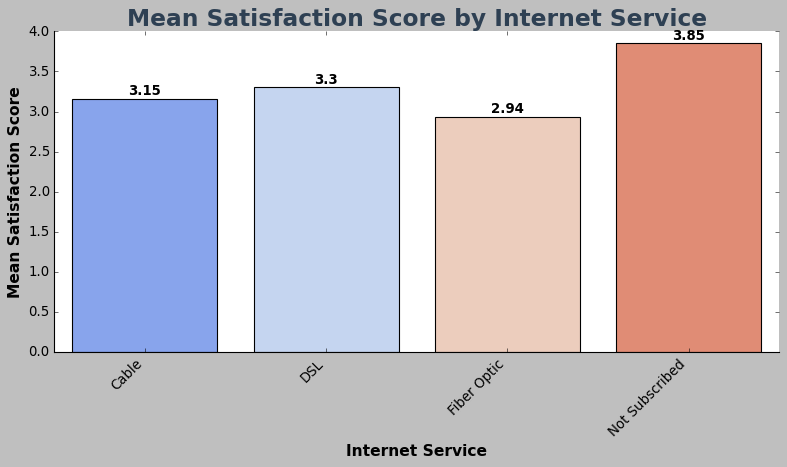

In [84]:
# Calculate the mean satisfaction score for each internet service category
mean_satisfaction_by_internet = data.groupby("Internet Type")["Satisfaction Score"].mean().reset_index()

# Create a bar plot for mean satisfaction score
plt.figure(figsize=(10, 6))
sns.barplot(x="Internet Type", y="Satisfaction Score", data=mean_satisfaction_by_internet, palette='coolwarm', saturation=0.8)

# Set title and labels with customized fonts
plt.title('Mean Satisfaction Score by Internet Service', fontsize=21, fontweight='bold', color='#2E4053')
plt.xlabel('Internet Service', fontsize=14, fontweight='bold')
plt.ylabel('Mean Satisfaction Score', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Add value labels to the bars
for i in range(len(mean_satisfaction_by_internet)):
    plt.text(i, 
             mean_satisfaction_by_internet['Satisfaction Score'][i] + 0.05, # Adjust position slightly above bars
             round(mean_satisfaction_by_internet['Satisfaction Score'][i], 2), 
             ha='center', fontsize=12, fontweight='bold', color='black')

# Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Adjust layout to make room for the rotated x-labels
plt.tight_layout()

# Show plot
plt.show()


<Axes: ylabel='Frequency'>

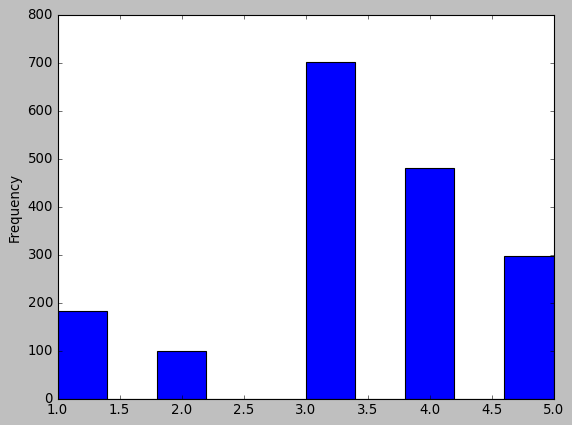

In [85]:
valued_customers["Satisfaction Score"].plot(kind="hist")

### Calculating and adding Churn Rate

In [86]:
churn_rate = (data["Churn Label"].value_counts()["Yes"] / data["Churn Label"].shape[0]) * 100
f"The Churn Rate of Telco in Q3 is {round(churn_rate, 2)}%"

'The Churn Rate of Telco in Q3 is 26.54%'

---
The Churn Rate of Telco in Q3 is 26.54%

---

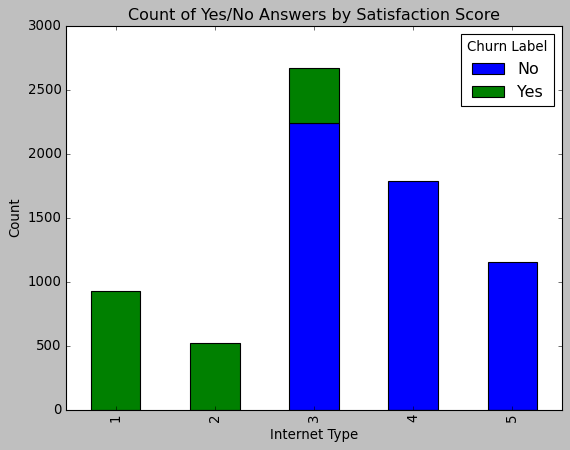

In [88]:
data.groupby(['Satisfaction Score', 'Churn Label']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Internet Type')
plt.ylabel('Count')
plt.title('Count of Yes/No Answers by Satisfaction Score')
plt.show()

In [97]:
# Refactoring the age group in to new series age range.

age_range = []

for i in data["Age"]:
    if i >= 18 and i <= 24:
        age_range.append("18-24")
    elif i >= 25 and i <= 34:
        age_range.append("25-34")
    elif i >= 35 and i <= 44:
        age_range.append("35-44")
    elif i >= 45 and i <= 54:
        age_range.append("45-54")
    elif i >= 55 and i <= 64:
        age_range.append("55-64")
    else:
        age_range.append("65+")

data["Age Range"] = age_range

In [98]:
# Found a more efficient approach for the age range series

# Define the age bins and corresponding labels
bins = [18, 24, 34, 44, 54, 64, 100]  # Age ranges (last bin is for 65+)
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

# Use pd.cut() to categorize the ages into these bins
data["Age Range"] = pd.cut(data["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

data["Age Range"]

0         65+
1         65+
2         65+
3         65+
4         65+
        ...  
7038    25-34
7039    35-44
7040    25-34
7041    25-34
7042    35-44
Name: Age Range, Length: 7043, dtype: category
Categories (6, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

In [100]:
# Converting the values in the "Age Range" column from object types to strings
# to avoid compatibility issues.
data["Age Range"] = data["Age Range"].astype(str)

# Verify the data type change
data["Age Range"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Age Range
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


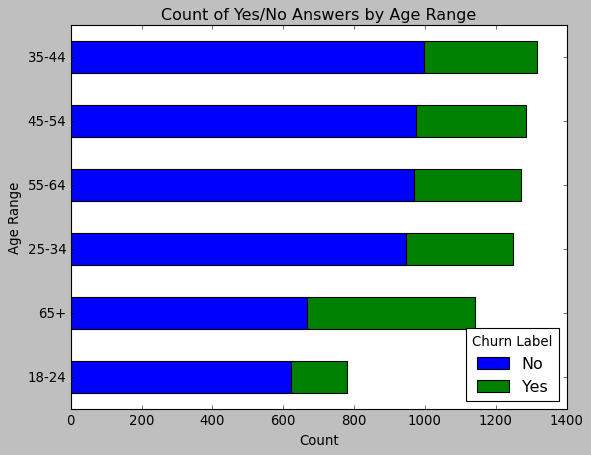

In [104]:
# Group by 'Age Range' and 'Churn Label', then get the size of each group
grouped_ages = data.groupby(['Age Range', 'Churn Label']).size().unstack()

# Sort by the total count of 'Churn Label' (descending order)
grouped_ages = grouped_ages.loc[grouped_ages.sum(axis=1).sort_values().index]

# Create the horizontal stacked bar plot
grouped_ages.plot(kind='barh', stacked=True)

# Adjust labels and title
plt.xlabel('Count')
plt.ylabel('Age Range')
plt.title('Count of Yes/No Answers by Age Range')
plt.show()


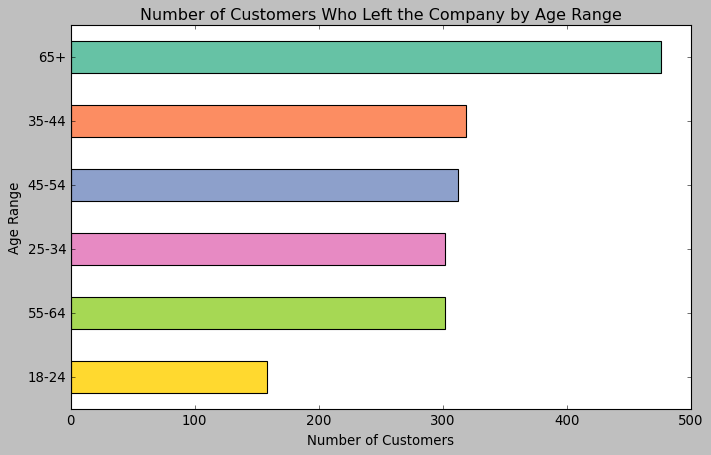

In [111]:
# Group by 'Age Range' and count the number of churned customers
churn_counts_by_age = churned_customers["Age Range"].value_counts().sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
churn_counts_by_age.plot(kind='barh', color=sns.color_palette("Set2"))

# Add labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Age Range')
plt.title('Number of Customers Who Left the Company by Age Range')
plt.gca().invert_yaxis()  # Invert the y-axis to display in descending order
plt.show()

In [112]:
# Updating valued customers
valued_customers = data[data["CLTV"] >= 5380.5]

In [118]:
# Find what the popular internet type among users aged 65+ is.
data[data["Age Range"] == "65+"]["Internet Type"].mode()

0    Fiber Optic
Name: Internet Type, dtype: object

In [120]:
# Create a Churn Score Category 

c_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  
c_labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"]

# Use pd.cut() to categorize the ages into these bins
data["Churn Score Category"] = pd.cut(data["Churn Score"], bins=c_bins, labels=c_labels, right=True, include_lowest=True)

data["Churn Score Category"] = data["Churn Score Category"].astype(str)

data.filter(items=["Churn Score", "Churn Score Category"])

,Churn Score,Churn Score Category
0,91,91-100
1,69,61-70
2,81,81-90
3,88,81-90
4,67,61-70
...,...,...
7038,45,41-50
7039,59,51-60
7040,71,71-80
7041,59,51-60


In [122]:
data.to_excel("telco analyzed.xlsx", sheet_name="Data")